<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/2_1_4_1_Lab_Coffee_Roasting_in_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab - Coffee Roasting in Numpy

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

import tensorflow as tf

## Functions

In [2]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

## Dataset

In [3]:
path = 'https://raw.githubusercontent.com/PaulToronto/'
path += 'Stanford-Andrew-Ng-Machine-Learning-Specialization/main/data/'
path += 'coffee.csv'

coffee = pd.read_csv(path)
coffee

,Temperature,Duration,Quality
0,185.32,12.69,1.0
1,259.92,11.87,0.0
2,231.01,14.41,0.0
3,175.37,11.72,0.0
4,187.12,14.13,1.0
...,...,...,...
195,223.78,15.30,0.0
196,266.63,12.48,0.0
197,273.68,13.10,0.0
198,220.61,12.80,1.0


In [4]:
X = coffee.drop('Quality', axis=1).values
Y = coffee[['Quality']].values
X.shape, Y.shape

((200, 2), (200, 1))

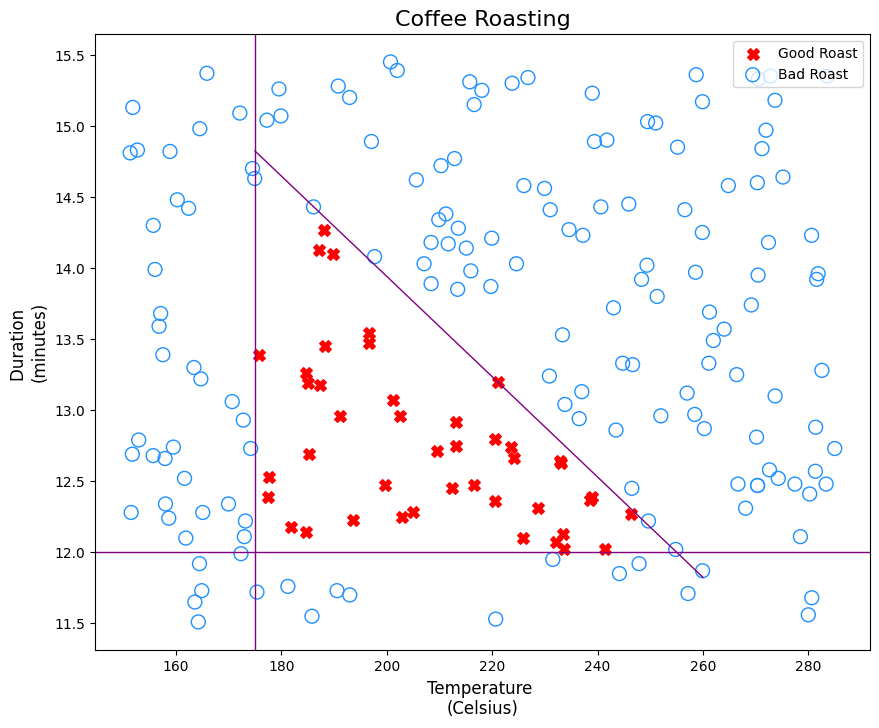

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

y = Y.reshape(-1, )
# temperature on x-axis, duration on y-axis
ax.scatter(X[y==1, 0], X[y==1, 1], s=70, marker='X', c='r', label='Good Roast')
ax.scatter(X[y==0, 0], X[y==0, 1], s=100, marker='o', facecolor='none',
           edgecolors='dodgerblue', linewidth=1, label='Bad Roast')
ax.axhline(y=12, color='purple', linewidth=1)
ax.axvline(x=175, color='purple', linewidth=1)
tr = np.linspace(175, 260, 50)
ax.plot(tr, (-3/85) * tr + 21, color='purple', linewidth=1)

ax.set_title('Coffee Roasting', size=16)
ax.set_xlabel("Temperature \n(Celsius)",size=12)
ax.set_ylabel("Duration \n(minutes)",size=12)
ax.legend(loc='upper right')

plt.show()

## Normalize Data

In [6]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


## Numpy Model (Forward Propagation in Numpy)

<img src='https://drive.google.com/uc?export=view&id=1E16ACEMFRfLNBA4MLac7wpULyboDcVgJ'>

## Define `dense(a_in, W, b, g)` to compute the activations of a dense layer

In [7]:
def dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units
    Returns
      a_out (ndarray (j,))  : j units|
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):
        w = W[:,j]
        z = np.dot(w, a_in) + b[j]
        a_out[j] = g(z)
    return(a_out)

## Build a two-layer neural network

In [8]:
def sequential(x, W1, b1, W2, b2, g):
    a1 = dense(x, W1, b1, g)
    a2 = dense(a1, W2, b2, g)
    return a2

In [9]:
# weights obtained by training in TensorFlow
W1_tmp = np.array([[-10.0355835 , 0.08937748, -17.92395],
                   [ -0.21964656, -8.377202, -14.961986]])
b1_tmp = np.array([-10.929696, -10.53901, -2.5372286])
W2_tmp = np.array([[-41.07575],
                   [-36.81419],
                   [29.82899]])
b2_tmp = np.array( [-8.462966])

## `predict()`: a routine similar to TensorFlow's `model.predict()`

In [10]:
def predict(X, W1, b1, W2, b2, g):
    m = X.shape[0]
    p = np.zeros((m, 1))
    for i in range(m):
        p[i, 0] = sequential(X[i], W1, b1, W2, b2, g)

    return p

In [11]:
X_test = np.array([
                    [200, 13.9], # positive example
                    [300, 17]] # negative example
                  )
X_test_n = norm_l(X_test)
predictions = predict(X_test_n, W1_tmp, b1_tmp, W2_tmp, b2_tmp, sigmoid)
predictions

array([[9.71019737e-01],
       [2.11100313e-04]])

In [12]:
y_hat = (predictions >= 0.5).astype(int)
y_hat

array([[1],
       [0]])

In [13]:
predictions = predict(Xn, W1_tmp, b1_tmp, W2_tmp, b2_tmp, sigmoid)
predictions

array([[9.99999981e-01],
       [3.77633131e-11],
       [2.11094385e-04],
       [8.84408832e-16],
       [9.99999960e-01],
       [9.99832014e-01],
       [2.11730129e-04],
       [2.42281402e-04],
       [2.11099688e-04],
       [9.99999902e-01],
       [9.99999999e-01],
       [2.11100273e-04],
       [1.51759845e-04],
       [2.10689602e-04],
       [1.41429791e-18],
       [1.06056332e-09],
       [2.11099956e-04],
       [2.16351246e-04],
       [2.11891596e-04],
       [2.10227450e-04],
       [2.11095428e-04],
       [2.10954568e-04],
       [2.10109389e-04],
       [9.99999993e-01],
       [1.85744295e-23],
       [2.10656008e-04],
       [2.11100306e-04],
       [2.04229094e-04],
       [2.11092896e-04],
       [9.99999961e-01],
       [4.84059596e-06],
       [1.98986306e-01],
       [3.31461257e-09],
       [2.04011842e-08],
       [2.11976509e-04],
       [2.10972740e-04],
       [2.11086024e-04],
       [2.11180331e-04],
       [2.68450425e-05],
       [2.11074847e-04],


In [14]:
y_hat = (predictions >= 0.5).astype(int)
y_hat

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [15]:
sum(y_hat == Y) / len(Y) # 100% accuracy

array([1.])

## Layer Functions

Let's examine the functions of the units to determine their role in the coffee roasting decision. We will plot the output of each node for all values of the inputs (duration,temp). Each unit is a logistic function whose output can range from zero to one. The shading in the graph represents the output value.

In [16]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """ truncates color map """
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [17]:
def plt_prob(ax, fwb):
    """ plots a decision boundary but include shading to indicate the probability """
    x0_space = np.linspace(150, 285, 40)
    x1_space = np.linspace(11.5, 15.5, 40)

    # get probability for X0, X1 ranges
    tmp_x0, tmp_x1 = np.meshgrid(x0_space, x1_space)
    z = np.zeros_like(tmp_x0)
    for i in range(tmp_x0.shape[0]):
        for j in range(tmp_x1.shape[1]):
            x = np.array([[tmp_x0[i, j],
                           tmp_x1[i, j]]])
            z[i, j] = fwb(x)

    cmap = plt.get_cmap('Blues')
    new_cmap = truncate_colormap(cmap, 0.0, 0.5)
    pcm = ax.pcolormesh(tmp_x0, tmp_x1, z, cmap=new_cmap,
                        norm=cm.colors.Normalize(vmin=0, vmax=1),
                        shading='nearest', alpha=0.9)
    ax.figure.colorbar(pcm, ax=ax)

In [18]:
def plt_layer(X, Y, W1, b1, norm_1):
    y = Y.reshape(-1,)

    fig, ax = plt.subplots(1, W1.shape[1], figsize=(16, 4))
    for i in range(W1.shape[1]):
        layerf = lambda x: sigmoid(np.dot(norm_1(x), W1[:, i]) + b1[i])
        plt_prob(ax[i], layerf)
        ax[i].scatter(X[y==1, 0], X[y==1, 1], s=70,
                      marker='X', c='r')
        ax[i].scatter(X[y==0, 0], X[y==0, 1], s=100,
                      marker='o', facecolor='none',
                      edgecolors='dodgerblue', linewidth=1)
        ax[i].axhline(y=12, color='purple', linewidth=1)
        ax[i].axvline(x=175, color='purple', linewidth=1)
        tr = np.linspace(175, 260, 50)
        ax[i].plot(tr, (-3/85) * tr + 21, color='purple', linewidth=1)
        ax[i].set_title(f'Layer 1, unit {i}')
        ax[1].set_xlabel('Temperature \n(Celsius)', size=12)
    ax[0].set_ylabel('Duration \n(minutes)', size=12)

    plt.show()

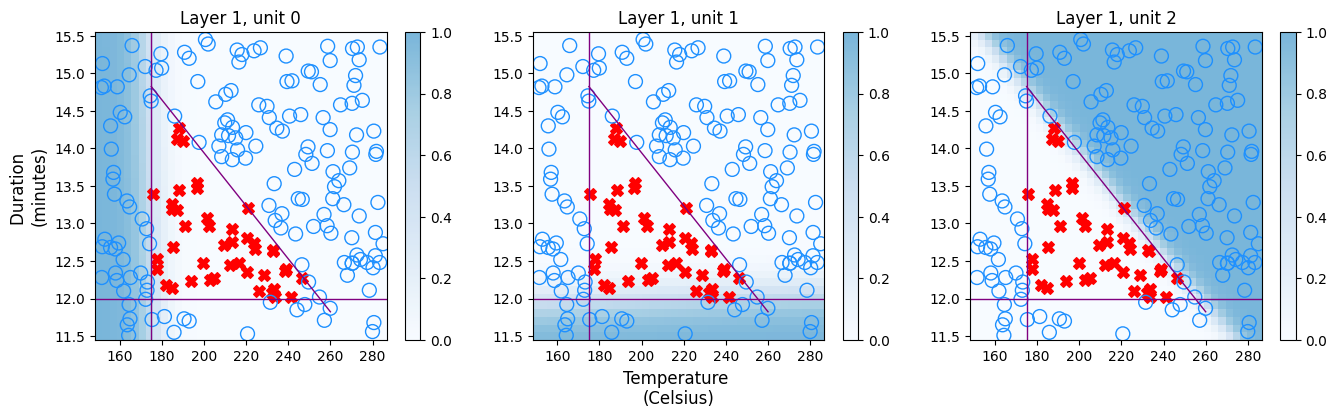

In [19]:
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])

plt_layer(X, Y, W1, b1, norm_l)